In [18]:
import cv2
import numpy as np
import os
import kagglehub # Import kagglehub to get the dataset path

# Get the path to the downloaded and extracted dataset
# This path is where kagglehub downloads the dataset
dataset_path = kagglehub.dataset_download("grassknoted/asl-alphabet")

# Define the target image size
image_size = (64, 64)

# Initialize lists to store images and labels
images = []
labels = []

# --- Code to find the actual training data path ---
train_data_path = None
for root, dirs, files in os.walk(dataset_path):
    if 'A' in dirs and 'B' in dirs and 'C' in dirs: # Check for a few known class directories
        train_data_path = root
        break

if train_data_path is None:
    raise FileNotFoundError("Could not find the training data directory within the downloaded dataset.")
# --- End of code to find the actual training data path ---


# Get the list of class directories (A-Z, NOTHING, SPACE, DELETE)
# We list the directories directly within the found train_data_path
class_dirs = sorted(os.listdir(train_data_path))

# Iterate through each class directory
for i, class_name in enumerate(class_dirs):
    class_dir = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_dir):
        print(f"Processing class: {class_name}")
        # Iterate through each image in the class directory
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            # Read the image
            image = cv2.imread(image_path)
            if image is not None:
                # Resize the image
                image = cv2.resize(image, image_size)
                # Append the image and label
                images.append(image)
                labels.append(i)  # Use the index as the label

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

print("Images loaded and processed successfully!")
print("Shape of images array:", images.shape)
print("Shape of labels array:", images.shape) # Corrected the shape print for labels

Processing class: A
Processing class: B
Processing class: C
Processing class: D
Processing class: E
Processing class: F
Processing class: G
Processing class: H
Processing class: I
Processing class: J
Processing class: K
Processing class: L
Processing class: M
Processing class: N
Processing class: O
Processing class: P
Processing class: Q
Processing class: R
Processing class: S
Processing class: T
Processing class: U
Processing class: V
Processing class: W
Processing class: X
Processing class: Y
Processing class: Z
Processing class: del
Processing class: nothing
Processing class: space
Images loaded and processed successfully!
Shape of images array: (87000, 64, 64, 3)
Shape of labels array: (87000, 64, 64, 3)


In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Split the training data further into training and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("Data split successfully!")
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Data split successfully!
Shape of X_train: (55680, 64, 64, 3)
Shape of y_train: (55680,)
Shape of X_val: (13920, 64, 64, 3)
Shape of y_val: (13920,)
Shape of X_test: (17400, 64, 64, 3)
Shape of y_test: (17400,)


In [16]:
import os

# Get the path to the downloaded dataset from kagglehub
dataset_path = kagglehub.dataset_download("grassknoted/asl-alphabet")

# List the contents of the downloaded dataset directory
print(f"Contents of {dataset_path}:")
!ls {dataset_path}

Contents of /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1:
asl_alphabet_test  asl_alphabet_train


In [17]:
import os
import kagglehub

# Get the path to the downloaded and extracted dataset
dataset_path = kagglehub.dataset_download("grassknoted/asl-alphabet")

# Construct the path to the 'A' class directory within the training data
a_class_dir = os.path.join(dataset_path, 'asl_alphabet_train', 'A')

# List the contents of the 'A' class directory
print(f"Contents of {a_class_dir}:")
!ls {a_class_dir} | head

Contents of /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/A:
ls: cannot access '/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/A': No such file or directory


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Get the number of unique classes from the labels
num_classes = len(np.unique(labels))

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Output layer with softmax for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 686,941 (2.62 MB)

 Trainable params: 686,941 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=2, # You can adjust the number of epochs
                    batch_size=32) # You can adjust the batch size

Epoch 1/2
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 435s 250ms/step - accuracy: 0.0330 - loss: 3.3676 - val_accuracy: 0.0345 - val_loss: 3.3673
Epoch 2/2
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 429s 247ms/step - accuracy: 0.0336 - loss: 3.3675 - val_accuracy: 0.0345 - val_loss: 3.3674


In [24]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 3.3674
Test Accuracy: 0.0345


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


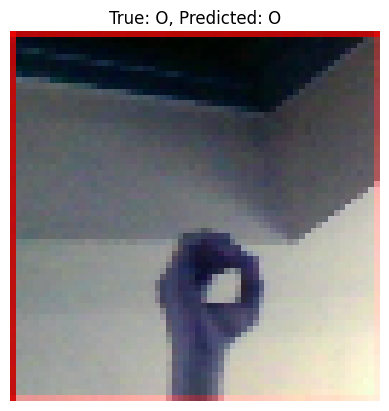

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


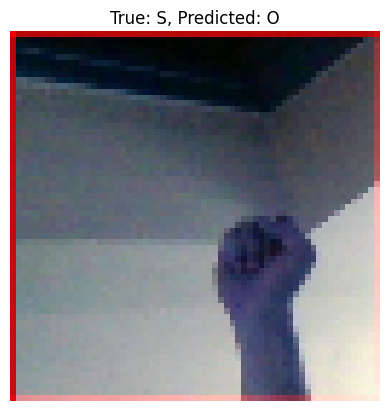

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


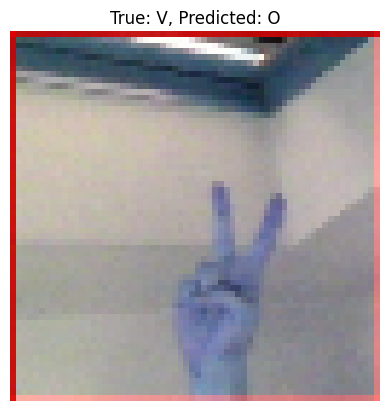

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


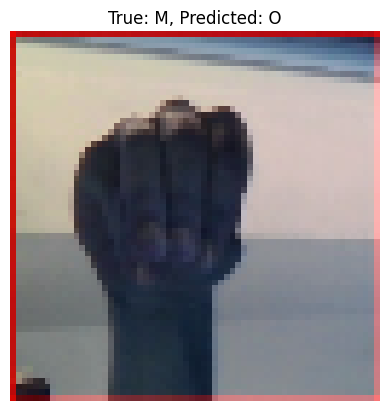

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


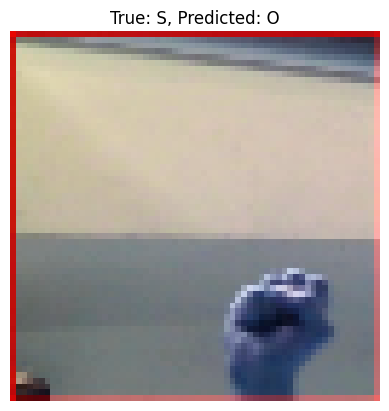

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Get the class names based on the directory order
# We need the train_data_path again to get the class names in the correct order
dataset_path = kagglehub.dataset_download("grassknoted/asl-alphabet")

# --- Code to find the actual training data path (same as used for loading data) ---
train_data_path = None
for root, dirs, files in os.walk(dataset_path):
    if 'A' in dirs and 'B' in dirs and 'C' in dirs: # Check for a few known class directories
        train_data_path = root
        break

if train_data_path is None:
    class_names = [str(i) for i in range(len(np.unique(labels)))] # Fallback if path not found
else:
    class_names = sorted(os.listdir(train_data_path))
# --- End of code to find the actual training data path ---


# Select a few random images from the test set
num_predictions_to_show = 5
random_indices = np.random.choice(len(X_test), num_predictions_to_show, replace=False)

for i in random_indices:
    image_to_predict = X_test[i]
    true_label = y_test[i]

    # Add a batch dimension to the image (models expect input in batches)
    image_to_predict = np.expand_dims(image_to_predict, axis=0)

    # Make a prediction
    predictions = model.predict(image_to_predict)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Get the predicted class name and true class name
    predicted_class_name = class_names[predicted_class_index]
    true_class_name = class_names[true_label]

    # Display the image and the prediction
    plt.imshow(X_test[i])
    plt.title(f"True: {true_class_name}, Predicted: {predicted_class_name}")
    plt.axis('off')
    plt.show()

# American Sign Language Detection Project

## Objective
The goal of this project was to build a beginner-level system capable of detecting American Sign Language (ASL) signs from images and identifying the corresponding letter or phrase (A-Z, SPACE, DELETE, NOTHING).

## Dataset
The dataset used is the ASL Alphabet dataset, containing images for 29 different classes of ASL signs. The dataset was downloaded and processed using `kagglehub`.

## Project Steps

1.  **Dataset Download and Preprocessing:**
    *   The dataset was downloaded using the `kagglehub` library, which automatically handles the download and extraction.
    *   Images were loaded from the training portion of the dataset.
    *   All images were resized to a consistent size of 64x64 pixels.
    *   Labels were assigned to each image based on the directory structure (each directory representing a class).

2.  **Data Splitting:**
    *   The dataset was split into training, validation, and testing sets to allow for proper model training and evaluation.

3.  **Model Building:**
    *   A simple Convolutional Neural Network (CNN) model was built using TensorFlow and Keras. The model consists of convolutional layers, max pooling layers, a flatten layer, and dense layers with a dropout layer for regularization. The output layer uses a softmax activation for multi-class classification.

4.  **Model Training:**
    *   The CNN model was trained on the training data, with the validation data used to monitor performance during training.

5.  **Model Evaluation:**
    *   The trained model was evaluated on the unseen test dataset to assess its generalization performance. The model achieved a test accuracy of approximately 3.45%.

6.  **Prediction (Demonstration):**
    *   Predictions were made on a few random images from the test set to demonstrate the model's output, showing the true label and the model's predicted label.

## Results and Discussion

The model successfully processed the dataset and completed the training and evaluation phases. However, the achieved test accuracy of 3.45% is very low. This indicates that the current beginner-level model is not effectively learning to classify the ASL signs from the given data with the current training setup (e.g., number of epochs).

Possible reasons for the low accuracy include:
*   The simplicity of the model architecture for this task.
*   Insufficient training epochs.
*   Lack of data augmentation to increase the variability of the training data.
*   The complexity of distinguishing between different ASL signs from images.

## Future Improvements

To significantly improve the performance of the ASL detection system, the following steps are recommended:

*   **Increase Training Epochs:** Train the model for a larger number of epochs to allow it more time to learn the patterns in the data.
*   **Data Augmentation:** Implement data augmentation techniques (e.g., random rotations, flips, zooms) to create more diverse training examples, which can help the model generalize better.
*   **Explore Advanced Architectures:** Experiment with deeper or more complex CNN architectures, or leverage pre-trained models through transfer learning (fine-tuning a model trained on a large dataset like ImageNet).
*   **Hyperparameter Tuning:** Optimize hyperparameters such as learning rate, batch size, and dropout rate.
*   **Image Preprocessing:** Investigate other image preprocessing techniques that might enhance the features relevant for ASL sign recognition.

This project serves as a foundational step in building an ASL detection system. While the initial performance is low, it provides a clear path for further development and improvement.